<a href="https://colab.research.google.com/github/bxs-machine-learning-club/GradientDescent/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
X = np.arange(100)
n = len(X)
noise = np.random.normal(loc=0, scale=10, size=100)
m = 1/2
b = 50
y = m*X + b + noise
y[y>100] = 100

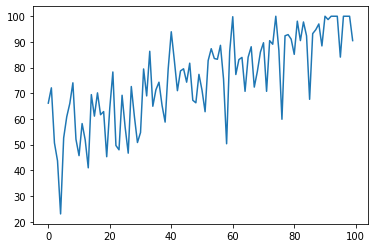

In [167]:
plt.plot(X, y)

In [168]:
# split the data into training and testing datasets
def train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2):
  if (shuffle):
    np.random.shuffle(X)
    y = y[X]
  train_index = round(len(X)*train_size)
  print(train_index)
  X_train, y_train = X[:train_index], y[:train_index]
  X_test, y_test = X[train_index:], y[train_index:]
  return X_train, X_test, y_train, y_test

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y_test)

80
[ 86.35987048  90.51976993  74.31408906  87.36467466  43.71663166
  71.35645534 100.          58.78817349  64.9529438   54.72240856
  83.97230948  90.49152434 100.          45.72403953  71.01900421
  56.74918475  70.76462029  88.67507936  97.77239347  50.83523347]


In [170]:
# Gradient descent
def fit(X_train, y_train, n_steps=200, alpha=0.0002, beta=0.08): 
  losses = np.array([])
  params = np.array([0.0,0.0])

  for i in range(n_steps):
    # compute new line
    y_pred = params[0] * X_train + params[1]
    #print(f'y_pred {y_pred[:5]}')
    # compute loss
    loss = (1/n) * np.sum((y_train - y_pred) ** 2)
    #print(f'loss {loss}')
    #print(loss)
    losses = np.append(losses, loss)

    # compute gradient
    delta_m = (2/n) * np.sum(X_train * (y_train - y_pred)) * alpha
    delta_b = (2/n) * np.sum(y_train - y_pred) * beta
    grad = np.array([delta_m, delta_b]) 
    #print(f"+m: {grad[0]} +b {grad[1]}")
    # update params
    params = params + grad
    #print(f'm={params[0]} b={params[1]}')

  return params, losses

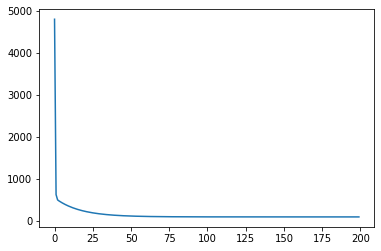

In [171]:
params, losses = fit(X_train, y_train)
#print(losses)

plt.plot(np.arange(len(losses)), losses)
plt.show()

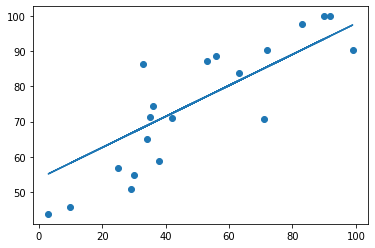

In [174]:
def predict(X_test):
  y_pred = params[0] * X_test + params[1]
  return y_pred

y_pred = predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()   

In [175]:
def compute_loss(X_test, y_test):
  return np.sum((y_test - X_test) ** 2)

loss = compute_loss(X_test, y_pred)
print(loss)

18064.42554850524
